In [20]:
import pandas as pd
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import numpy as np

In [15]:
true_vals_df = pd.read_csv('true_vals.csv')
bert_result_df = pd.read_csv('bert_sep_3_1e-5_epoch_200_predicted_vals.csv')
roberta_result_df = pd.read_csv('roberta_sep_32_2e-5_epoch_200_predicted_vals.csv')
true_vals = list(true_vals_df['0'])
bert_result = list(bert_result_df['0'])
roberta_result = list(roberta_result_df['0'])

In [5]:
print(true_vals)

[3.3499999046325684, 5.849999904632568, 3.799999952316284, 3.549999952316284, 5.75, 3.799999952316284, 5.400000095367432, 3.849999904632568, 5.0, 4.099999904632568, 2.0, 4.349999904632568, 3.3499999046325684, 2.8499999046325684, 4.900000095367432, 4.199999809265137, 3.049999952316284, 3.849999904632568, 4.75, 3.799999952316284, 3.700000047683716, 4.25, 2.3499999046325684, 5.099999904632568, 3.299999952316284, 4.349999904632568, 4.300000190734863, 5.300000190734863, 5.900000095367432, 5.400000095367432, 2.950000047683716, 2.0, 3.25, 4.449999809265137, 3.700000047683716, 4.449999809265137, 3.700000047683716, 5.050000190734863, 2.700000047683716, 6.150000095367432, 4.150000095367432, 2.0999999046325684, 4.199999809265137, 4.449999809265137, 3.5999999046325684, 5.0, 5.449999809265137, 4.25, 5.550000190734863, 5.849999904632568, 6.050000190734863, 5.099999904632568, 5.349999904632568, 4.349999904632568, 3.299999952316284, 3.900000095367432, 6.150000095367432, 5.199999809265137, 5.5999999046

In [7]:
print(bert_result)

[5.1105943, 5.460523, 4.737376, 4.633655, 4.7017508, 4.6331067, 4.586859, 4.590859, 5.03736, 4.4578576, 4.1557155, 4.2687993, 4.5361795, 4.793145, 4.5954432, 4.8954153, 4.482537, 4.437657, 4.299408, 4.694804, 4.425661, 4.7569914, 4.6997824, 4.3502755, 4.310936, 4.1764226, 4.294272, 4.300433, 4.578199, 4.325065, 4.2179055, 4.292654, 4.300476, 4.8345737, 4.3442664, 4.381939, 4.7935653, 4.279889, 4.223293, 4.602777, 4.455355, 4.255908, 4.391873, 4.650676, 4.773479, 4.3408003, 4.8472676, 4.5051427, 4.2884316, 4.9468274, 4.5079775, 4.5960326, 4.285484, 4.6867847, 4.2713223, 4.897131, 4.428845, 4.587707, 4.7876234, 4.3540664, 4.274108, 4.381366, 4.4689364, 4.747382, 4.4116936, 4.3824124, 4.418245, 4.876871, 4.3337517, 4.6287985, 4.1094756, 4.000366, 3.9083626, 4.8732142, 4.235293, 4.529748, 4.427127, 4.432798, 3.9354818, 4.2607617, 4.4063697, 4.419253, 4.5747485, 3.9528239, 3.9428785, 4.606726, 4.5975614, 4.417526, 4.178608, 4.773371, 4.482577, 4.8167076, 5.0504427, 4.499249, 4.240703, 4.413

In [29]:
def scatter_plot(x, y):

    fig, ax = plt.subplots(figsize=(10,10))

    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes('right', size='5%', pad=0.05)

    # fig = plt.figure(figsize=(12,10))
    plt.xlim(min(x), max(x)+1)
    plt.ylim(min(y), max(y)+1)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    plt.xlabel('True values', fontsize=32)
    plt.ylabel('Predicted values', fontsize=32)

    ax.scatter(x, y, color='blue')
    ax.tick_params(axis='both', which='major', labelsize=32)
    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    plt.show()
    # filename = "tsne_log.eps"
    # plt.savefig(f"../tsne/eps/{filename}", bbox_inches='tight', format='eps')

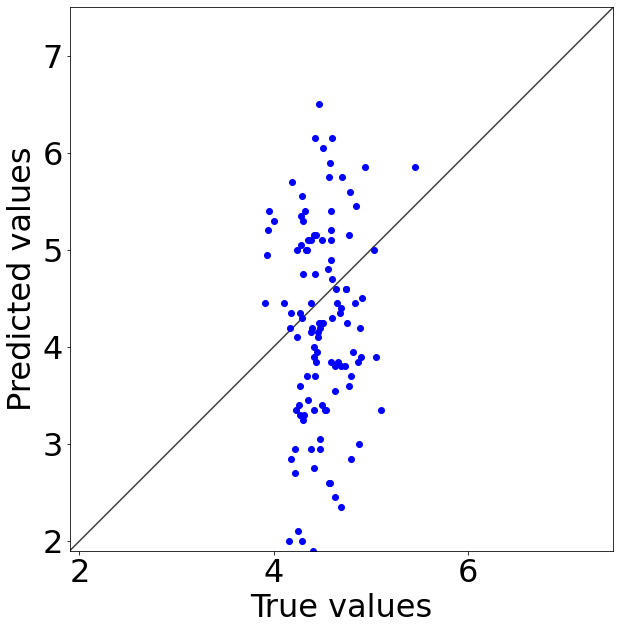

In [30]:
scatter_plot(bert_result, true_vals)

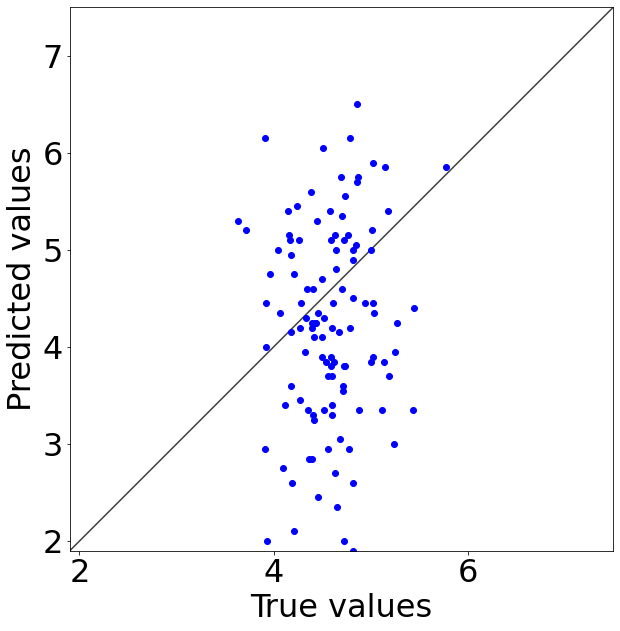

In [31]:
scatter_plot(roberta_result, true_vals)

In [37]:
def boxplot(result_list, title, xlabel, ylabel, xlist, xticks_fontsize, yticks_fontsize, median_color='#ff7f0e', log_scale=False):
    if median_color == 'black':
        title = title + '_median_black'
    
    if not log_scale:
        title += '_linear'
    
        
    filename = title + '.eps'
    
    plt.rcParams['figure.figsize'] = [30, 20]

    plt.boxplot(result_list, showfliers=False, boxprops= dict(linewidth=10, color='black'),
               whiskerprops=dict(linestyle='-',linewidth=10, color='black'),
               capprops=dict(linewidth=10), medianprops=dict(linewidth=10, color=median_color))
    
    # plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=20)
    plt.xticks(xlist, xlabel, fontsize=xticks_fontsize)
    plt.yticks(fontsize=yticks_fontsize)
    # plt.ylabel(ylabel, fontsize=40)
    
    if log_scale:
        plt.yscale('log')
    # plt.title(title, fontsize=30)
    
    # plt.savefig(f"../figure/eps/{filename}", format='eps', bbox_inches='tight')
    
    # plt.show()

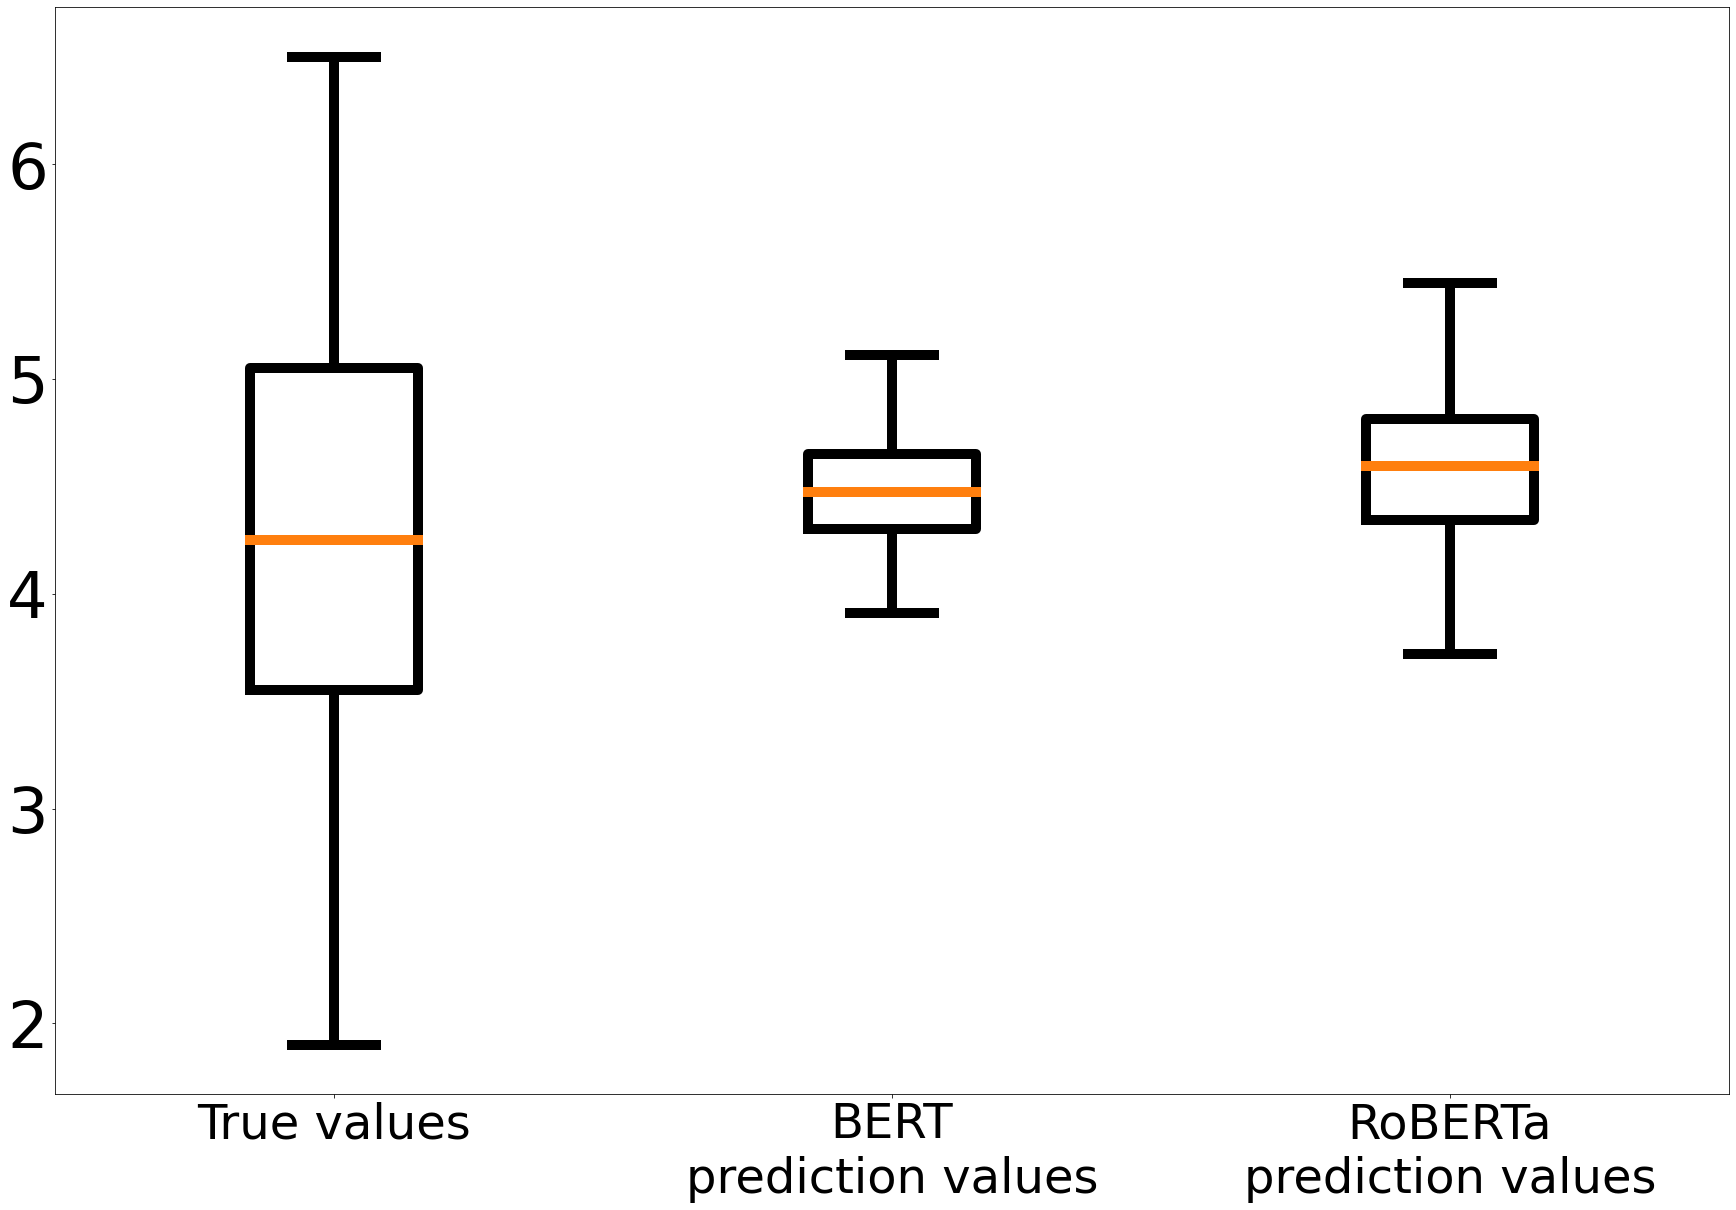

In [44]:
result_list = [true_vals, bert_result, roberta_result]
xlabel = [f"True values", f"BERT\nprediction values", f"RoBERTa\nprediction values"]
boxplot(result_list, '', xlabel, '', [1, 2, 3], 48, 64)